The purpose of this notebook is to show descriptive statistics about the data. It helps to get insight into the data to help answer certain questions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.ExcelFile('Fashion Data/DataPenjualanFashion.xlsx')

print(data.sheet_names)

data = pd.read_excel('Fashion Data/DataPenjualanFashion.xlsx', sheet_name=None)

['DASHBOARD', 'SalesItems', 'ProductItems', 'Pivot Table']


c:\Users\Tanis\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Slicer List extension is not supported and will be removed
  warn(msg)


In [2]:
#https://machinelearningmastery.com/skewness-be-gone-transformative-tricks-for-data-scientists/

All product names are unique, all are from the same brand, and all data are from females. These are not needed for future predictions. Catalog_price is the marketed price of the item and cost_price is the cost it took for the company to make the item

In [3]:
products = data['ProductItems']
products 

,product_id,product_name,category,brand,color,size,catalog_price,cost_price,gender
0,1,Soft Wrap Dress,Dresses,Tiva,Green,S,40.41,20.70,Female
1,2,Soft Wrap Tee,T-Shirts,Tiva,White,S,78.45,53.76,Female
2,3,Soft Linen Tee,T-Shirts,Tiva,Green,XL,23.90,14.81,Female
3,4,Soft Ribbed Tee,T-Shirts,Tiva,White,S,60.00,34.78,Female
4,5,Soft Wrap Trousers,Pants,Tiva,Blue,M,36.84,16.46,Female
...,...,...,...,...,...,...,...,...,...
495,496,Tailored High-Waist Trousers,Pants,Tiva,Black,S,54.61,27.63,Female
496,497,Dresses Drop 8,Dresses,Tiva,Black,L,36.05,20.73,Female
497,498,T-Shirts Drop 8,T-Shirts,Tiva,White,L,38.33,16.23,Female
498,499,Sleepwear Drop 4,Sleepwear,Tiva,Green,M,30.07,20.82,Female


In [4]:
products['category'].value_counts()

category
Dresses      109
T-Shirts     108
Sleepwear    104
Shoes        100
Pants         79
Name: count, dtype: int64

In [5]:
products['color'].value_counts()

color
Black    104
Green    102
Blue     102
Red       98
White     94
Name: count, dtype: int64

In [6]:
products['size'].value_counts()

size
XS    107
S      84
XL     81
L      76
M      72
36     25
38     20
40     19
35     16
Name: count, dtype: int64

There is a funnel shape. Indicates non-constant variance. Good to handle when predictions will be made. Check if there is more non constant variance in other data

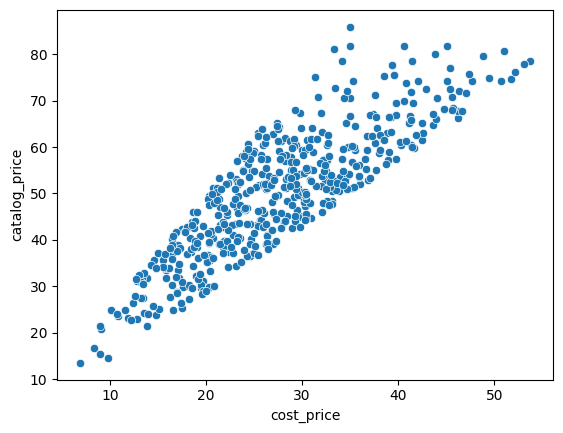

In [7]:
sns.scatterplot(x='cost_price', y='catalog_price', data=products)
plt.show()

Generate median of these values to see the average estimated revenue per item

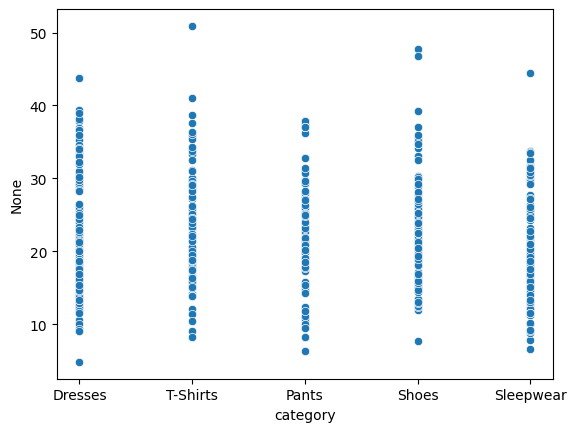

In [8]:
revenue = products['catalog_price'] - products['cost_price']

sns.scatterplot(x=products['category'], y=revenue, data=products)
plt.show()

This data has problems. Will tidy this data before proceeding. Opening a separate excel window to see which values belong to which variable

In [9]:
pivot = data['Pivot Table']
pivot

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Channels,Totals Of Original Price,NaN,NaN,NaN,NaN,NaN
2,App Mobile,53952.79,NaN,NaN,NaN,NaN,NaN
3,E-commerce,57167.84,NaN,NaN,NaN,NaN,NaN
4,Grand Total,111120.63,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Type Product,Total Catalog Price,Total Cost Price,NaN,NaN,NaN,NaN
9,Dresses,5298.44,2917.77,NaN,NaN,NaN,NaN


In [10]:
channel_data = {'Channels' : ['App Mobile', 'E-commerce'],
                'Totals Of Original Price' : [53952.79, 57167.84]}

types_data = {'Type Product' : ['Dresses', 'Pants', 'Shoes', 'Sleepwear', 'T-Shirt', 'Grand Total'],
         'Total Catalog Price' : [5298.44, 3959.36, 5236.03, 4933.21, 5511.98, 24939.02], 
         'Total Cost Price' : [2917.77, 2149.76, 2908.44, 2785.75, 2962.69, 13724.41]}

channel = pd.DataFrame(channel_data)
types = pd.DataFrame(types_data)

In [11]:
channel

,Channels,Totals Of Original Price
0,App Mobile,53952.79
1,E-commerce,57167.84


In [12]:
types

,Type Product,Total Catalog Price,Total Cost Price
0,Dresses,5298.44,2917.77
1,Pants,3959.36,2149.76
2,Shoes,5236.03,2908.44
3,Sleepwear,4933.21,2785.75
4,T-Shirt,5511.98,2962.69
5,Grand Total,24939.02,13724.41


In [13]:
pivot = pivot.dropna()
pivot = pivot.drop(19)
pivot = pivot.rename(columns={'Unnamed: 0' : 'Row Labels', 'Unnamed: 1' : 'Dresses', 'Unnamed: 2' : 'Pants', 
                      'Unnamed: 3' : 'Shoes','Unnamed: 4' : 'Sleepwear', 'Unnamed: 5' : 'T-Shirts', 
                      'Unnamed: 6' : 'Grand Total'})
pivot

,Row Labels,Dresses,Pants,Shoes,Sleepwear,T-Shirts,Grand Total
20,Black,18,13,26,26,21,104
21,Blue,26,17,23,13,23,102
22,Green,16,19,18,28,21,102
23,Red,27,14,19,18,20,98
24,White,22,16,14,19,23,94
25,Grand Total,109,79,100,104,108,500


In [14]:
products

,product_id,product_name,category,brand,color,size,catalog_price,cost_price,gender
0,1,Soft Wrap Dress,Dresses,Tiva,Green,S,40.41,20.70,Female
1,2,Soft Wrap Tee,T-Shirts,Tiva,White,S,78.45,53.76,Female
2,3,Soft Linen Tee,T-Shirts,Tiva,Green,XL,23.90,14.81,Female
3,4,Soft Ribbed Tee,T-Shirts,Tiva,White,S,60.00,34.78,Female
4,5,Soft Wrap Trousers,Pants,Tiva,Blue,M,36.84,16.46,Female
...,...,...,...,...,...,...,...,...,...
495,496,Tailored High-Waist Trousers,Pants,Tiva,Black,S,54.61,27.63,Female
496,497,Dresses Drop 8,Dresses,Tiva,Black,L,36.05,20.73,Female
497,498,T-Shirts Drop 8,T-Shirts,Tiva,White,L,38.33,16.23,Female
498,499,Sleepwear Drop 4,Sleepwear,Tiva,Green,M,30.07,20.82,Female


In [15]:
sales_items = data['SalesItems']

sales_items

,quantity,original_price,unit_price,item_total,channel,channel_campaigns
0,1,81.80,81.80,81.80,App Mobile,App Mobile
1,1,81.79,81.79,81.79,E-commerce,Website Banner
2,1,80.76,80.76,80.76,App Mobile,App Mobile
3,1,78.52,78.52,78.52,App Mobile,App Mobile
4,1,78.52,78.52,78.52,App Mobile,App Mobile
...,...,...,...,...,...,...
2248,5,20.82,20.82,104.10,E-commerce,Website Banner
2249,5,20.82,20.82,104.10,E-commerce,Website Banner
2250,5,28.98,20.29,101.43,App Mobile,App Mobile
2251,5,16.69,16.69,83.45,App Mobile,App Mobile


There are no missing values in the data. No need to handle this

In [16]:
print('sales items')
print(len(sales_items))
print(len(sales_items.dropna()))
print(sales_items.isnull().sum())
print('\nproducts')
print(len(products))
print(len(products.dropna()))
print(products.isnull().sum())


sales items
2253
2253
quantity             0
original_price       0
unit_price           0
item_total           0
channel              0
channel_campaigns    0
dtype: int64

products
500
500
product_id       0
product_name     0
category         0
brand            0
color            0
size             0
catalog_price    0
cost_price       0
gender           0
dtype: int64


Finding outliers and trying to handle them

In [60]:
products

,product_id,product_name,category,brand,color,size,catalog_price,cost_price,gender
0,1,Soft Wrap Dress,Dresses,Tiva,Green,S,40.41,20.70,Female
1,2,Soft Wrap Tee,T-Shirts,Tiva,White,S,78.45,53.76,Female
2,3,Soft Linen Tee,T-Shirts,Tiva,Green,XL,23.90,14.81,Female
3,4,Soft Ribbed Tee,T-Shirts,Tiva,White,S,60.00,34.78,Female
4,5,Soft Wrap Trousers,Pants,Tiva,Blue,M,36.84,16.46,Female
...,...,...,...,...,...,...,...,...,...
495,496,Tailored High-Waist Trousers,Pants,Tiva,Black,S,54.61,27.63,Female
496,497,Dresses Drop 8,Dresses,Tiva,Black,L,36.05,20.73,Female
497,498,T-Shirts Drop 8,T-Shirts,Tiva,White,L,38.33,16.23,Female
498,499,Sleepwear Drop 4,Sleepwear,Tiva,Green,M,30.07,20.82,Female


In [63]:
# sales_items is tabular numerical data. Could find outliers 
# with IQR 

# Finding outliers in the original_price
from scipy.stats import iqr
og_data = sales_items['original_price']

og_Q1 = np.percentile(og_data, 25)
og_Q3 = np.percentile(og_data, 75)
og_IQR = og_Q3 - og_Q1

lower_bound = og_Q1 - (1.5 * og_IQR)
upper_bound = og_Q3 + (1.5 * og_IQR)

in_iqr = og_data[(og_data >= lower_bound) & (og_data <= upper_bound)]
outliers = og_data[(og_data < lower_bound) | (og_data > upper_bound)]

# It seems like the data is heavily skewed. There are no
# outliers
print(len(in_iqr))
len(outliers)

2253


0

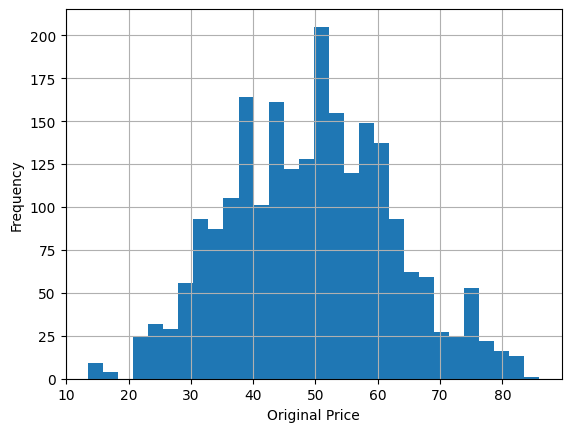

In [64]:
# Right-skewed distribution. More observations in lower prices
# Have to handle the positive skew by applying a transformation
# Then capping
plot = og_data.hist(bins=30)
plot.set_xlabel("Original Price")
plot.set_ylabel("Frequency")
plt.show()

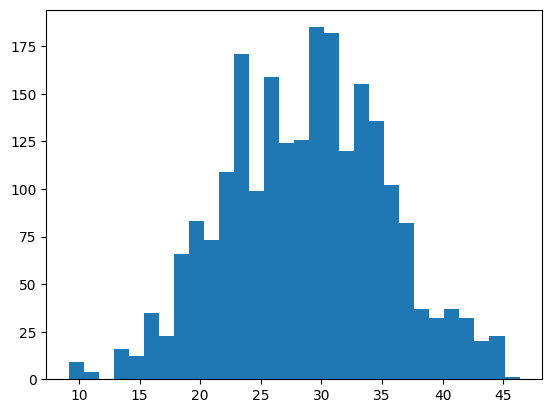

In [19]:
from scipy import stats

transformed_data, best_lambda = stats.boxcox(og_data)
plt.hist(transformed_data, bins=30)
plt.show()

In [20]:
# Finding outliers in the unit_price. Could show outliers
# Within the discounts

# Finding outliers in the unit_price
unit_data = sales_items['unit_price']

u_Q1 = np.percentile(unit_data, 25)
u_Q3 = np.percentile(unit_data, 75)
u_IQR = u_Q3 - u_Q1

lower_bound = u_Q1 - (1.5 * u_IQR)
upper_bound = u_Q3 + (1.5 * u_IQR)

in_iqr = unit_data[(unit_data >= lower_bound) & (unit_data <= upper_bound)]
outliers = unit_data[(unit_data < lower_bound) | (unit_data > upper_bound)]

# It seems like the data is heavily skewed. There are no
# outliers
print(len(in_iqr))
len(outliers)

2252


1

<Axes: >

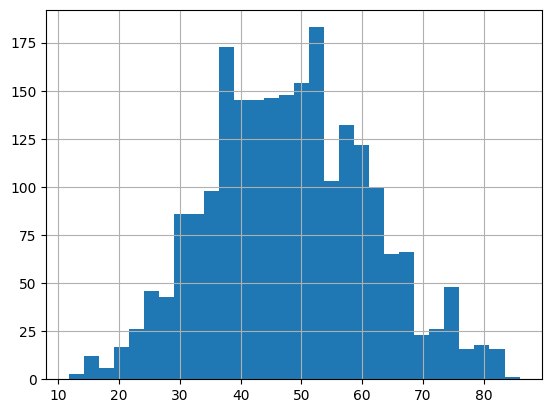

In [21]:
unit_data.hist(bins=30)

In [22]:
# Finding outliers in the unit_price. Could show outliers
# Within the discounts

# Finding outliers in the unit_price
item_data = sales_items['item_total']

i_Q1 = np.percentile(item_data, 25)
i_Q3 = np.percentile(item_data, 75)
i_IQR = i_Q3 - i_Q1

lower_bound = i_Q1 - (1.5 * i_IQR)
upper_bound = i_Q3 + (1.5 * i_IQR)

in_iqr = item_data[(item_data >= lower_bound) & (item_data <= upper_bound)]
outliers = item_data[(item_data < lower_bound) | (item_data > upper_bound)]

# It seems like the data is heavily skewed. There are no
# outliers
print(len(in_iqr))
len(outliers)

2245


8

<Axes: >

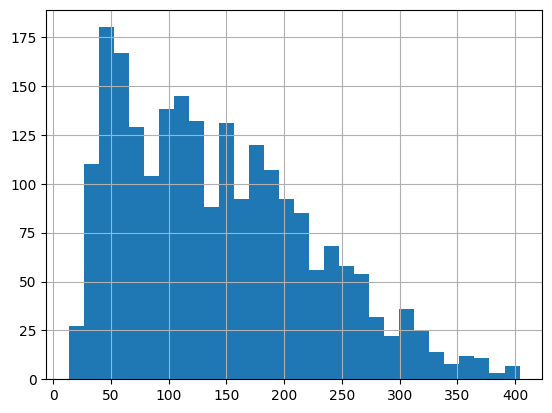

In [23]:
item_data.hist(bins=30) # Very positively skewed

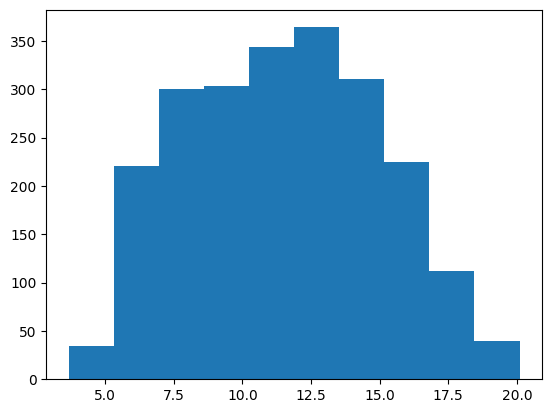

In [56]:
new_item = np.sqrt(item_data)
plt.hist(new_item)
plt.show()

Finding the types of clothes that are generating the most sales/revenue. Original_price in sales_items and catalog_price in products is how we can compare the two datasets to find. There are 25/500 duplicates in catalog_price, however, so this is an approximation.

In [25]:
names = set(products['product_name'])
original_prices = products['catalog_price']
prices = set(products['catalog_price'])

print(len(names), len(original_prices), len(prices))

500 500 475


In [26]:
products

,product_id,product_name,category,brand,color,size,catalog_price,cost_price,gender
0,1,Soft Wrap Dress,Dresses,Tiva,Green,S,40.41,20.70,Female
1,2,Soft Wrap Tee,T-Shirts,Tiva,White,S,78.45,53.76,Female
2,3,Soft Linen Tee,T-Shirts,Tiva,Green,XL,23.90,14.81,Female
3,4,Soft Ribbed Tee,T-Shirts,Tiva,White,S,60.00,34.78,Female
4,5,Soft Wrap Trousers,Pants,Tiva,Blue,M,36.84,16.46,Female
...,...,...,...,...,...,...,...,...,...
495,496,Tailored High-Waist Trousers,Pants,Tiva,Black,S,54.61,27.63,Female
496,497,Dresses Drop 8,Dresses,Tiva,Black,L,36.05,20.73,Female
497,498,T-Shirts Drop 8,T-Shirts,Tiva,White,L,38.33,16.23,Female
498,499,Sleepwear Drop 4,Sleepwear,Tiva,Green,M,30.07,20.82,Female


Making new dataframes. Extracting the quantity and item_total by the original_price. Also getting the cost by the catalog_price, category, and colour. Making a new column to see the cost that it took to make each product. 

In [27]:
sales_sum = sales_items.groupby('original_price').agg(
    quantity = ('quantity', 'sum'),
    customer_spent =('item_total', 'sum')
).reset_index()

product_sum = products.groupby(['catalog_price', 'category', 'color']).agg(
    cost = ('cost_price', 'sum')
).reset_index()

product_compare = pd.merge(
    sales_sum,
    product_sum,
    left_on='original_price',
    right_on='catalog_price',
    how='left'
)

product_compare['cost_to_make'] = product_compare['cost'] * product_compare['quantity']

product_compare

,original_price,quantity,customer_spent,catalog_price,category,color,cost,cost_to_make
0,13.51,1,13.51,13.51,Sleepwear,Black,6.85,6.85
1,14.64,15,219.60,14.64,Dresses,Blue,9.80,147.00
2,15.31,9,137.79,15.31,Pants,Green,8.95,80.55
3,16.69,14,203.62,16.69,T-Shirts,Black,8.37,117.18
4,20.82,19,395.58,20.82,Dresses,Black,9.05,171.95
...,...,...,...,...,...,...,...,...
492,81.06,12,972.72,81.06,Shoes,White,33.32,399.84
493,81.70,25,1919.95,81.70,T-Shirts,Green,40.65,1016.25
494,81.79,10,817.90,81.79,Shoes,White,35.02,350.20
495,81.80,5,376.28,81.80,Dresses,Red,45.12,225.60


Most popular item for both value sorts are blue dresses. Mid-range prices are the most popular. 

In [28]:
product_compare.sort_values(by='customer_spent', ascending=False).head(20)

,original_price,quantity,customer_spent,catalog_price,category,color,cost,cost_to_make
432,65.26,44,2819.23,65.26,Dresses,Blue,34.56,1520.64
433,65.26,44,2819.23,65.26,Shoes,Black,42.46,1868.24
423,64.08,43,2736.22,64.08,Dresses,Green,31.03,1334.29
424,64.08,43,2736.22,64.08,Dresses,Red,29.93,1286.99
466,72.10,36,2379.30,72.10,Pants,Green,34.70,1249.20
493,81.70,25,1919.95,81.70,T-Shirts,Green,40.65,1016.25
477,74.81,26,1907.66,74.81,Pants,Green,49.48,1286.48
243,50.34,39,1882.72,50.34,T-Shirts,Blue,21.18,826.02
242,50.34,39,1882.72,50.34,Dresses,Blue,30.29,1181.31
478,75.17,24,1804.08,75.17,Dresses,Green,31.34,752.16


total_compare['profit'] = total_compare['customer_spent'] - total_compare['cost_to_make']
total_compare.sort_values(by=['category', 'color'], ascending=False)

The category and colors most bought to least bought

In [29]:
category_count = product_compare['category'].value_counts()
color_count = product_compare['color'].value_counts()

print(category_count)
print()
print(color_count)

category
Dresses      108
T-Shirts     108
Sleepwear    103
Shoes         99
Pants         79
Name: count, dtype: int64

color
Black    104
Blue     101
Green    101
Red       97
White     94
Name: count, dtype: int64


Finding the cheapest and most expensive to produce and how they do in sales

In [30]:
cheapest = product_compare.sort_values(by='cost', ascending=True).head(20)

cheapest

,original_price,quantity,customer_spent,catalog_price,category,color,cost,cost_to_make
0,13.51,1,13.51,13.51,Sleepwear,Black,6.85,6.85
3,16.69,14,203.62,16.69,T-Shirts,Black,8.37,117.18
2,15.31,9,137.79,15.31,Pants,Green,8.95,80.55
5,21.38,16,342.08,21.38,Pants,Black,9.00,144.00
4,20.82,19,395.58,20.82,Dresses,Black,9.05,171.95
1,14.64,15,219.60,14.64,Dresses,Blue,9.80,147.00
16,24.91,7,159.42,24.91,Dresses,Blue,10.08,70.56
12,24.05,13,305.44,24.05,Dresses,Red,10.75,139.75
10,23.68,10,236.80,23.68,Sleepwear,Black,10.86,108.60
17,24.96,11,264.57,24.96,Dresses,Black,11.57,127.27


In [31]:
expensive = product_compare.sort_values(by='cost', ascending=False).head(20)

expensive

,original_price,quantity,customer_spent,catalog_price,category,color,cost,cost_to_make
263,51.38,22,1078.99,51.38,Dresses,Green,68.31,1502.82
291,52.94,30,1551.14,52.94,Sleepwear,Red,65.32,1959.60
486,78.45,20,1474.86,78.45,T-Shirts,White,53.76,1075.20
485,77.90,5,389.50,77.90,Shoes,Blue,53.04,265.20
482,76.15,6,456.90,76.15,Shoes,Black,52.18,313.08
476,74.67,6,425.62,74.67,Sleepwear,Green,51.73,310.38
491,80.76,16,1292.16,80.76,Pants,Red,51.01,816.16
475,74.28,8,594.24,74.28,Shoes,Blue,50.66,405.28
477,74.81,26,1907.66,74.81,Pants,Green,49.48,1286.48
489,79.70,20,1594.00,79.70,Pants,Black,48.81,976.20


Two products cost more to make than what it is marketed for. Everything else is cheaper to make. The more costly products are being purchased at a higher quantity, however.

In [32]:
spent = product_compare['catalog_price']
make = product_compare['cost']

profit = spent > make
no_profit = make > spent

[i for i in no_profit if i == True]

[True, True]

Comparing across product groups rather than individual products. Depending on the category and colour of the clothing, the total quantity, money spent, and cost to make are calculated

In [33]:
total = sales_items.merge(
    products,
    left_on='original_price',
    right_on='catalog_price',
    how='left'
)

total['cost_to_make'] = total['cost_price'] * total['quantity']

total_compare = total.groupby(['category', 'color']).agg(
    sold_quantity=('quantity', 'sum'),
    customer_spent=('item_total', 'sum'),
    cost_to_make=('cost_to_make', 'sum')
).reset_index()

total_compare

,category,color,sold_quantity,customer_spent,cost_to_make
0,Dresses,Black,215,8825.78,4866.10
1,Dresses,Blue,414,19239.82,10790.75
2,Dresses,Green,316,16829.50,9424.31
3,Dresses,Red,417,20885.99,11536.64
4,Dresses,White,277,12733.43,7593.55
5,Pants,Black,188,8779.94,4834.28
6,Pants,Blue,254,12121.48,6009.70
7,Pants,Green,293,14257.63,8306.05
8,Pants,Red,209,11650.32,6536.95
9,Pants,White,217,11326.20,6505.54


In [34]:
total_compare['profit'] = total_compare['customer_spent'] - total_compare['cost_to_make']
total_compare.sort_values(by=['profit'], ascending=False)

,category,color,sold_quantity,customer_spent,cost_to_make,profit
10,Shoes,Black,462,23793.70,13728.82,10064.88
3,Dresses,Red,417,20885.99,11536.64,9349.35
1,Dresses,Blue,414,19239.82,10790.75,8449.07
24,T-Shirts,White,369,18615.72,10291.58,8324.14
17,Sleepwear,Green,426,19567.23,11638.66,7928.57
11,Shoes,Blue,401,18065.90,10346.72,7719.18
2,Dresses,Green,316,16829.50,9424.31,7405.19
12,Shoes,Green,286,14557.37,7728.45,6828.92
21,T-Shirts,Blue,308,15483.59,8683.62,6799.97
22,T-Shirts,Green,317,14651.49,8204.90,6446.59


Website banners seem to be the most effective at bringing in customers

In [35]:
sales_items['channel_campaigns'].value_counts()

channel_campaigns
Website Banner    1151
App Mobile         963
Social Media       120
Email               19
Name: count, dtype: int64

On average, customers spend $47.73. Without any potetial outliers, customers spend $49.76 on average

In [36]:
sales_items['unit_price'].median()

np.float64(47.73)

In [37]:
sales_items['item_total'].describe()

count    2253.000000
mean      143.913298
std        82.153406
min        13.510000
25%        74.700000
50%       130.500000
75%       198.750000
max       403.800000
Name: item_total, dtype: float64

Finding the total revenue of sales and the projected revenue. Customers frequently buy multiple of the same items which increased the revenue

In [44]:
types

,Type Product,Total Catalog Price,Total Cost Price
0,Dresses,5298.44,2917.77
1,Pants,3959.36,2149.76
2,Shoes,5236.03,2908.44
3,Sleepwear,4933.21,2785.75
4,T-Shirt,5511.98,2962.69
5,Grand Total,24939.02,13724.41


In [38]:
projected = types.iloc[5, 1] - types.iloc[5, 2]
profit = sales_items['item_total'].sum() - types.iloc[5, 2]

print(f"Projected: {projected}. Profit: {profit}")

Projected: 11214.61. Profit: 310512.25


Relationship between unit price and original price. This is to see if customers are usually paying less than the marketed price. It seems like a lot of customers pay the original price, however, discounts happen a lot. Higher discounts seem to occur more than lower discounts.

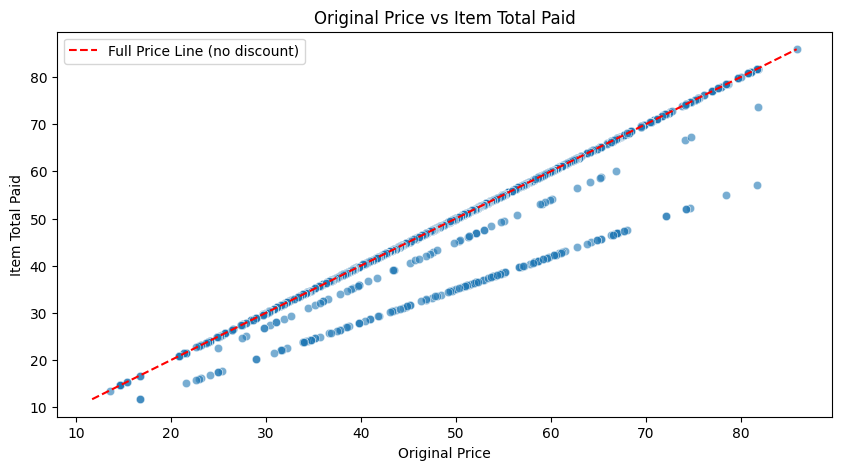

In [39]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=sales_items, x='original_price', y='unit_price', alpha=0.6)

# Add a diagonal line where item_total equals original_price (full price line)
min_price = min(sales_items['original_price'].min(), sales_items['unit_price'].min())
max_price = max(sales_items['original_price'].max(), sales_items['unit_price'].max())
plt.plot([min_price, max_price], [min_price, max_price], 
         color='red', linestyle='--', label='Full Price Line (no discount)')

plt.xlabel("Original Price")
plt.ylabel("Item Total Paid")
plt.title("Original Price vs Item Total Paid")
plt.legend()
plt.show()


Seeing the profit with the discounts. It seems like social media tend to have the highest rate of customers not paying the full price while website banner has the lowest.

In [45]:
sales_items['discount'] = (sales_items['quantity'] * sales_items['original_price']) - sales_items['item_total']
channel_discount = sales_items.groupby('channel_campaigns')['discount'].mean().sort_values(ascending=False)

channel_discount

channel_campaigns
Social Media      34.531833
Email              6.796842
App Mobile         2.739605
Website Banner     0.635725
Name: discount, dtype: float64

It seems like here are cycles for prices being high and low. Perhaps when a product gets released or when a specific time happens (season is an example) the price is at its highest. However, when the product gets older or when the time passes then the price drops

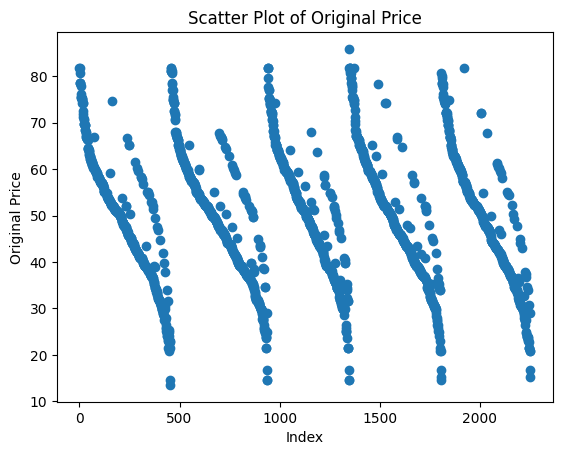

In [41]:
plt.scatter(sales_items.index, sales_items['original_price'])
plt.xlabel("Index")
plt.ylabel("Original Price")
plt.title("Scatter Plot of Original Price")
plt.show()

This perhaps shows the total amount of money a customer spent during their shopping trip. It seems like customers are buying more items in later cycles. The customers spending more money overtime shows a more positive outlook in predicting future revenue

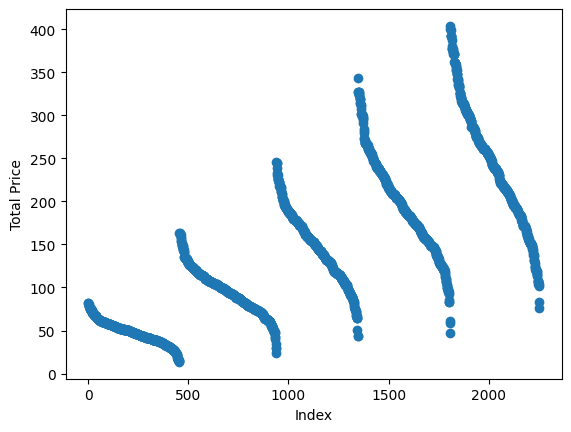

In [42]:
plt.scatter(sales_items.index, sales_items['item_total'])
plt.xlabel("Index")
plt.ylabel("Total Price")
plt.show()

Trying to see if there is multicollinearity. 

unit_price and original_price are 0.95
quanity and item_total are 0.84

multiple channel columns have high correlation (however this may be the result of the dummy variable trap. Will drop one value from each variable to handle this)

In [51]:
sales_items

,quantity,original_price,unit_price,item_total,channel,channel_campaigns,discount
0,1,81.80,81.80,81.80,App Mobile,App Mobile,0.00
1,1,81.79,81.79,81.79,E-commerce,Website Banner,0.00
2,1,80.76,80.76,80.76,App Mobile,App Mobile,0.00
3,1,78.52,78.52,78.52,App Mobile,App Mobile,0.00
4,1,78.52,78.52,78.52,App Mobile,App Mobile,0.00
...,...,...,...,...,...,...,...
2248,5,20.82,20.82,104.10,E-commerce,Website Banner,0.00
2249,5,20.82,20.82,104.10,E-commerce,Website Banner,0.00
2250,5,28.98,20.29,101.43,App Mobile,App Mobile,43.47
2251,5,16.69,16.69,83.45,App Mobile,App Mobile,0.00


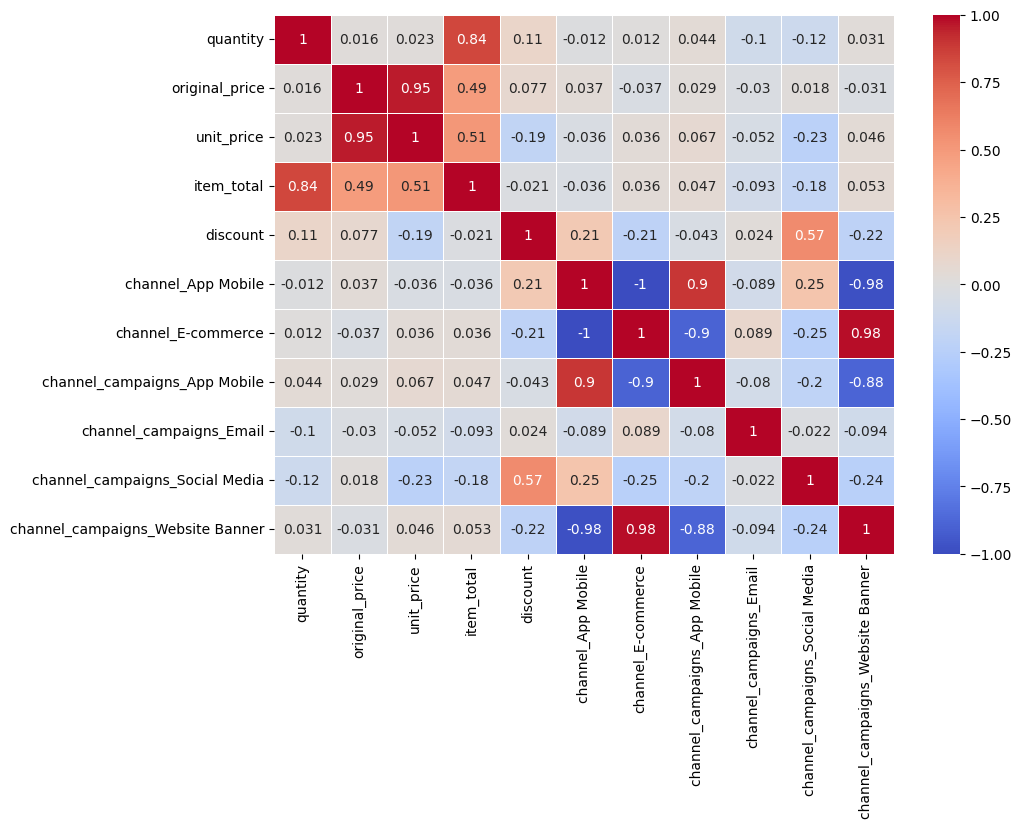

In [53]:
import seaborn as sns

encoded_sales = pd.get_dummies(sales_items)
correlation_matrix = encoded_sales.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

The correlation matrix improved, but there are still some correlated variables. However, these are naturally correlated. original_price, unit_price, and item_total all depend on each other. These can be handled 

When making the actual program try:
    dropping one value
    combining values
    dimensionality reduction
    regularization

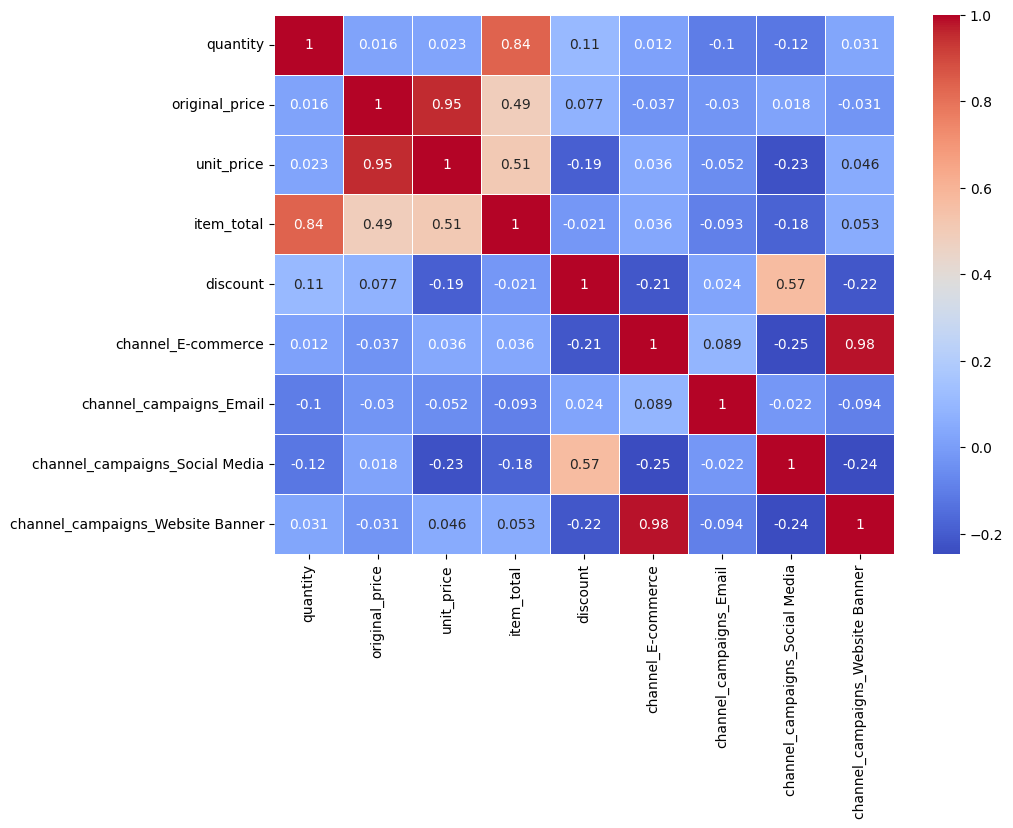

In [55]:
test_sales = pd.get_dummies(sales_items, columns=['channel', 'channel_campaigns'], drop_first=True)
test_matrix = test_sales.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(test_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()